# Predicting Heart Disease
The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

This project data is gotten from a company who has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv("heart.csv")

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We can clearly see that the Average Age of the patients is 53 with maximum age at 77 and minimum at 28

The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.

RestingBP and Cholesterol have a minimum value of zero.

In [6]:
# Check if their are missing values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in our data

In [7]:
heart_data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

### Visualizations for categorical columns

##### For Sex

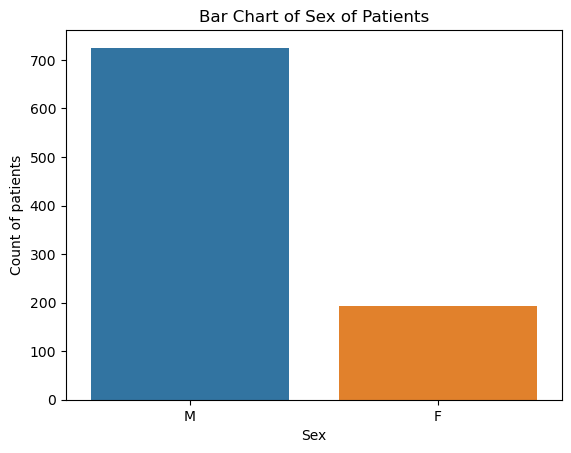

In [8]:
sns.countplot(x='Sex', data=heart_data)
plt.xlabel('Sex')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Sex of Patients')
plt.show()

We can see that our data has mostly male patients, we ave to consider that when building our model

##### For ChestPainType

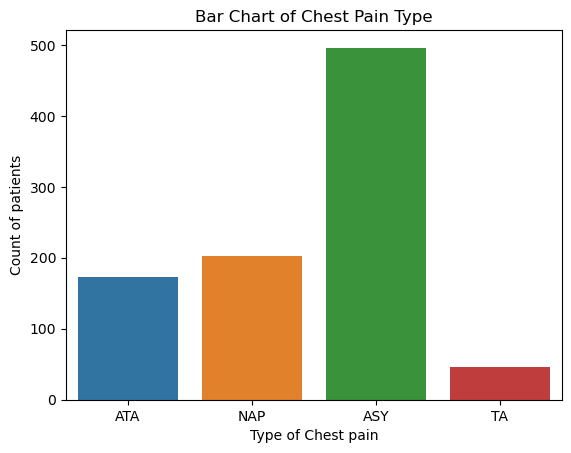

In [9]:
sns.countplot(x= 'ChestPainType', data=heart_data)
plt.xlabel('Type of Chest pain')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Chest Pain Type')
plt.show()

ASY has the largest number with ATA and NAP similar and TA having the smallest number of patients

##### For FastingBS	

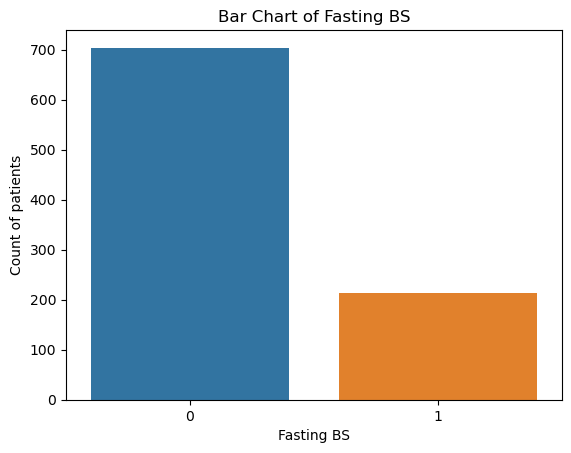

In [10]:
sns.countplot(x= 'FastingBS', data=heart_data)
plt.xlabel('Fasting BS')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Fasting BS')
plt.show()

Means we have about 200 people with  FastingBS > 120 mg/dl while the rest of the patients have lower

##### For RestingECG	

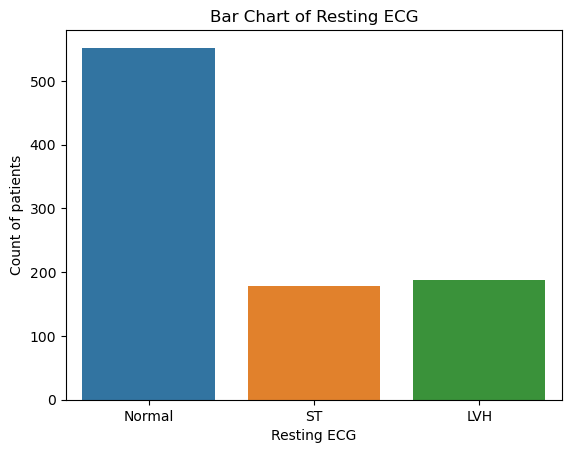

In [11]:
sns.countplot(x= 'RestingECG', data=heart_data)
plt.xlabel('Resting ECG')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Resting ECG')
plt.show()

This shows that we have the majority of patients with normal RestingECG While the rest is evenly divided between ST and LVH

##### For ExerciseAngina

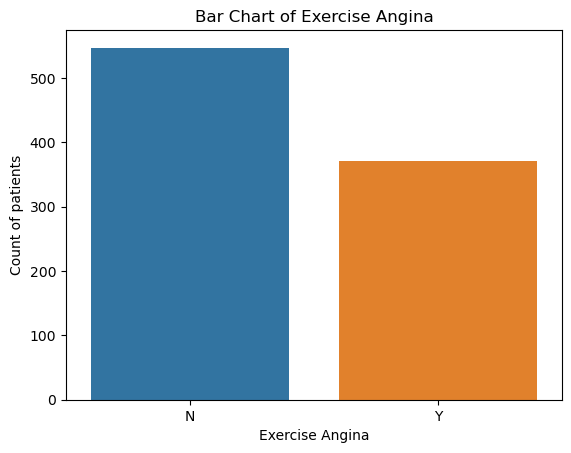

In [12]:
sns.countplot(x= 'ExerciseAngina', data=heart_data)
plt.xlabel('Exercise Angina')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Exercise Angina')
plt.show()

This shows that less of the Angina is caused by exercise 

##### For ST_Slope

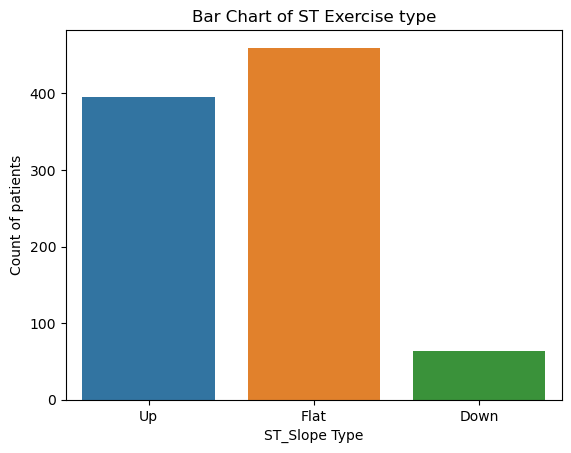

In [13]:
sns.countplot(x= 'ST_Slope', data=heart_data)
plt.xlabel('ST_Slope Type')
plt.ylabel('Count of patients')
plt.title('Bar Chart of ST Exercise type')
plt.show()

This shows that flat ST exercise is just the most popular over Up while DOWN is by far the least favourite 

##### For HeartDisease

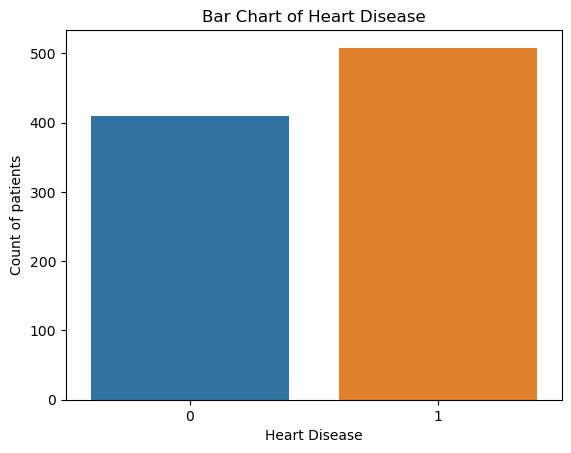

In [14]:
sns.countplot(x= 'HeartDisease', data=heart_data)
plt.xlabel('Heart Disease')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Heart Disease')
plt.show()

This chart shows that while more of our patients have Heart disease, it is still a fairly even sample as the difference is not much

### Visualizing the categorical columns grouped by Heart Disease

##### For Sex

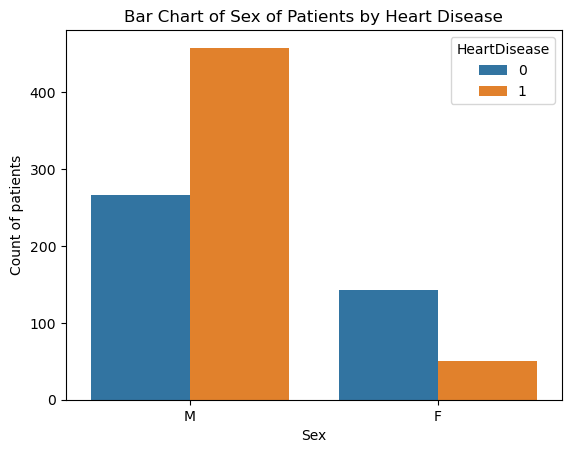

In [15]:
sns.countplot(x='Sex', hue = 'HeartDisease', data=heart_data)
plt.xlabel('Sex')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Sex of Patients by Heart Disease')
plt.show()

The number of males with Heart disease was more than their counterparts without while for the females the reverse was the the case with less females with heart disease than those with it

##### For ChestPainType

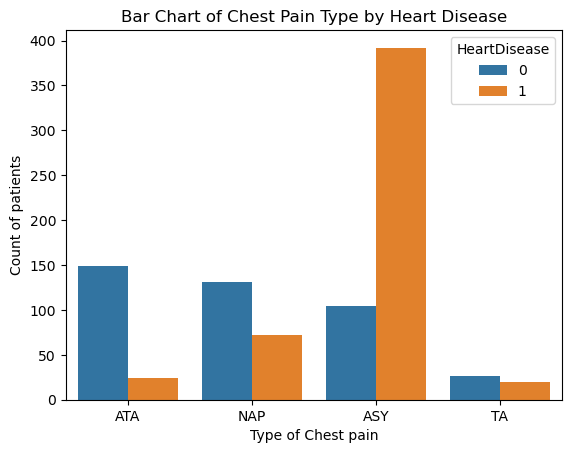

In [16]:
sns.countplot(x= 'ChestPainType', hue = 'HeartDisease', data=heart_data)
plt.xlabel('Type of Chest pain')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Chest Pain Type by Heart Disease')
plt.show()

ASY had the highest number of patients with Heart disease and was also the only category with more patients with the disease than without

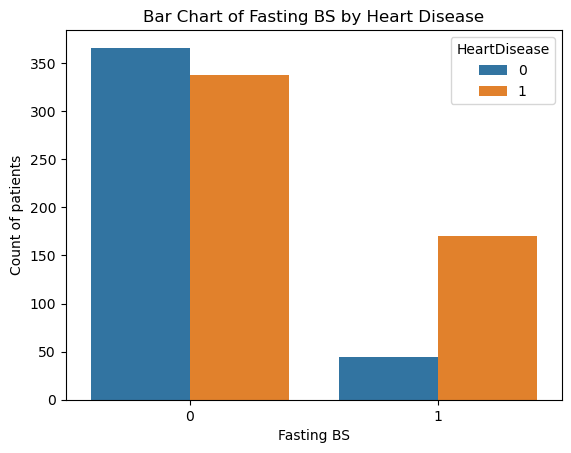

In [17]:
sns.countplot(x= 'FastingBS', hue = 'HeartDisease', data=heart_data)
plt.xlabel('Fasting BS')
plt.ylabel('Count of patients')
plt.title('Bar Chart of Fasting BS by Heart Disease')
plt.show()

The graph shows that among those with FastingBS lower than 120  mg/dl , we ave a pretty even divide among those with and without Heart Disease while in the case of those with High FastingBS the disease is more prevalent

## Data Wrangling

Even though we checked and saw that their was no mising data in our dataframe, some columns have 0 as data which we dont want

(heart_data['RestingBP']==0).sum()

In [18]:
(heart_data['Cholesterol']==0).sum()

172

Since we have only one row with 0 in the column 'RestingBP' we can remove that row by updating our dataframe without it

In [19]:
heart_data = heart_data[heart_data['RestingBP'] != 0]

In [20]:
# checking to see if row was deleted
heart_data.shape

(917, 12)

Since our Cholesterol column has a lot of 0, we are going to replace them with the median of the column minus the 0 values and also their corresponding HeartDisease values

In [21]:
# Getting the median of the Cholesterol column without adding the 0 values
median_cholesterol = np.median(heart_data.loc[heart_data['Cholesterol'] != 0, 'Cholesterol'])
median_cholesterol

237.0

In [22]:
# Replace 0 values in 'RestingBP' with the median
heart_data.loc[heart_data['Cholesterol'] == 0, 'Cholesterol'] = median_cholesterol

In [23]:
# Update 'HeartDisease' column with the same target number
target_number = heart_data.loc[heart_data['Cholesterol'] == median_cholesterol, 'HeartDisease'].iloc[0]
heart_data.loc[heart_data['Cholesterol'] == median_cholesterol, 'HeartDisease'] = target_number

In [24]:
heart_data[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,243.211559,132.540894
std,53.430044,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,237.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [25]:
# Checking to see if rows with 0 have been updated
(heart_data['Cholesterol']==0).sum()

0



## Feature Selection

We will first convert our categorical values into dummy variables

In [26]:
# Create dummy variables for categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
heart_data1 = pd.get_dummies(heart_data, columns=categorical_cols)

In [27]:
heart_data1 = heart_data1.astype(int)

In [28]:
heart_data1.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [29]:
heart_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                917 non-null    int32
 1   RestingBP          917 non-null    int32
 2   Cholesterol        917 non-null    int32
 3   MaxHR              917 non-null    int32
 4   Oldpeak            917 non-null    int32
 5   HeartDisease       917 non-null    int32
 6   Sex_F              917 non-null    int32
 7   Sex_M              917 non-null    int32
 8   ChestPainType_ASY  917 non-null    int32
 9   ChestPainType_ATA  917 non-null    int32
 10  ChestPainType_NAP  917 non-null    int32
 11  ChestPainType_TA   917 non-null    int32
 12  FastingBS_0        917 non-null    int32
 13  FastingBS_1        917 non-null    int32
 14  RestingECG_LVH     917 non-null    int32
 15  RestingECG_Normal  917 non-null    int32
 16  RestingECG_ST      917 non-null    int32
 17  ExerciseAngina_N   91

### Using Heatmap and pearson to determine the columns with highest correlation

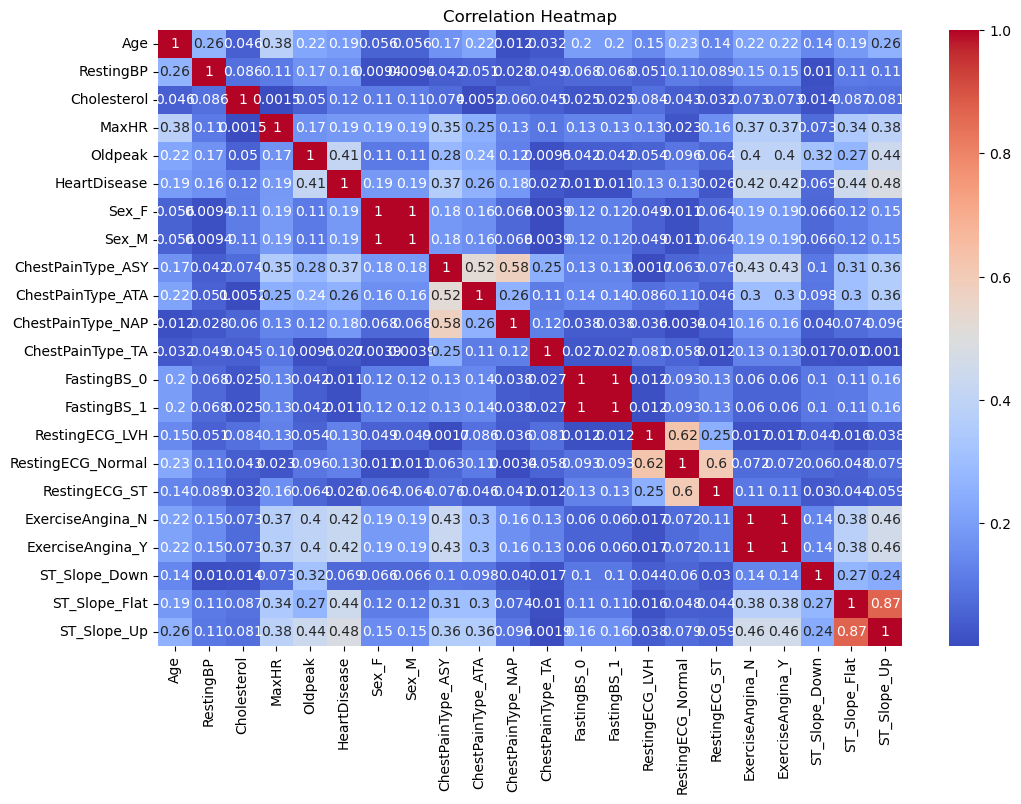

In [30]:
# Create a correlation matrix
corr_matrix = abs(heart_data1.corr())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:>

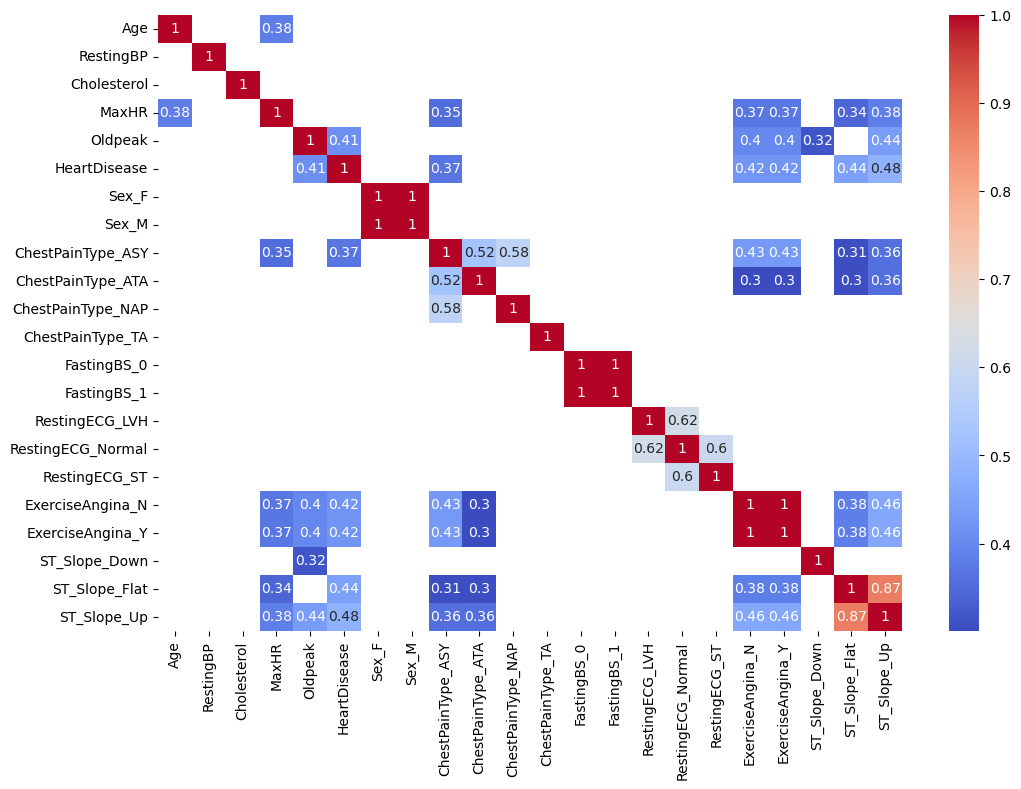

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[corr_matrix > 0.3], annot=True, cmap="coolwarm")

In [32]:
# Calculate Pearson correlation
correlations = heart_data1.corr()['HeartDisease'].abs().sort_values(ascending=False)

# Get the top 5 correlations (excluding 'HeartDisease' itself)
top_correlation = correlations[1:6]

print(top_correlation)

ST_Slope_Up         0.482835
ST_Slope_Flat       0.443126
ExerciseAngina_N    0.423004
ExerciseAngina_Y    0.423004
Oldpeak             0.411392
Name: HeartDisease, dtype: float64


In [33]:
# Separate features and target variable
X = heart_data1.drop('HeartDisease', axis=1)
y = heart_data1['HeartDisease']

In [34]:
# Select the column names from top_correlations DataFrame
top_feature_names = ['Sex_M', 'ST_Slope_Up', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'Oldpeak']

# Split the data into training and test sets using the top correlated features
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=417)

In [35]:
# Initialize the scaler
scaler = MinMaxScaler()

In [36]:
k = 5

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# Create a list to store the accuracies
accuracies = []

In [39]:
# Iterate over the top correlated features
for feature in top_feature_names:
    
   # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=5)

   # Fit the model to the training data
    knn.fit(X_train[[feature]], y_train)

   # Evaluate the model on the validation set
    accuracy = accuracy = knn.score(X_val[[feature]], y_val)

    print(f'Accuracy with feature "{feature}": {accuracy*100: .4f}%')

Accuracy with feature "Sex_M":  63.0435%
Accuracy with feature "ST_Slope_Up":  70.6522%
Accuracy with feature "ExerciseAngina_Y":  68.4783%
Accuracy with feature "ST_Slope_Flat":  70.1087%
Accuracy with feature "Oldpeak":  67.9348%


From the above accuracy result, it is clear that "ST_Slope_Flat" with an accuracy of 0.7011 perforemed the best while "ST_Slope_Up" and "ExerciseAngina_N" with 0.6304 perforemed the worst

Next we will try different value for k

In [40]:
k = 10

In [41]:
# Iterate over the top correlated features
for feature in top_feature_names:
    
   # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=10)

   # Fit the model to the training data
    knn.fit(X_train[[feature]], y_train)

   # Evaluate the model on the validation set
    accuracy = accuracy = knn.score(X_val[[feature]], y_val)

    print(f'Accuracy with feature "{feature}": {accuracy*100: .4f}%')

Accuracy with feature "Sex_M":  63.0435%
Accuracy with feature "ST_Slope_Up":  70.6522%
Accuracy with feature "ExerciseAngina_Y":  68.4783%
Accuracy with feature "ST_Slope_Flat":  70.1087%
Accuracy with feature "Oldpeak":  66.8478%


No much improvement in the model

we will try for k=100

In [42]:
k=100

In [43]:
# Iterate over the top correlated features
for feature in top_feature_names:
    
   # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=100)

   # Fit the model to the training data
    knn.fit(X_train[[feature]], y_train)

   # Evaluate the model on the validation set
    accuracy = accuracy = knn.score(X_val[[feature]], y_val)

    print(f'Accuracy with feature "{feature}": {accuracy*100: .4f}%')

Accuracy with feature "Sex_M":  63.0435%
Accuracy with feature "ST_Slope_Up":  70.6522%
Accuracy with feature "ExerciseAngina_Y":  68.4783%
Accuracy with feature "ST_Slope_Flat":  70.1087%
Accuracy with feature "Oldpeak":  67.9348%


### Building a Classifier with Multiple Features

In [44]:
knn1 =  KNeighborsClassifier(n_neighbors = 5)

In [45]:
# Scale the features of the train and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

In [46]:
knn1.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [47]:
val_accuracy1 = knn1.score(X_val_scaled, y_val)
print(f"Accuracy of model evaluated on validation set with K = 5: {val_accuracy1*100:.2f}%")


Accuracy of model evaluated on validation set with K = 5: 73.37%


The model performed slightly better with all the features than individually

### Using Gridsearch to get the best parameters

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Select the column names from top_correlations DataFrame
top_feature_names = ['Sex_M', 'ST_Slope_Up', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'Oldpeak']

# Split the data into training and test sets using the top correlated features
X_train, X_test, y_train, y_test = train_test_split(X[top_feature_names], y, test_size=0.2, random_state=417)


In [59]:
X_train_scaled1 = scaler.fit_transform(X_train[top_feature_names])

In [60]:
grid_params = {"n_neighbors": range(1, 10),
                "metric": ["minkowski", "manhattan"]
              }


In [61]:
knn2 = KNeighborsClassifier()

In [62]:
knn_search = GridSearchCV(knn2, grid_params, scoring='accuracy')

In [63]:
knn_search.fit(X_train_scaled1, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 10)},
             scoring='accuracy')

In [64]:
best_score = knn_search.best_score_
best_params = knn_search.best_params_

In [65]:
print(f"Best model's accuracy: {best_score*100:.2f}")
print(f"Best model's parameters: {best_params}")

Best model's accuracy: 75.84
Best model's parameters: {'metric': 'minkowski', 'n_neighbors': 8}


Our best model had an accuracy of ~76% with 8 n_neighbors and minkowski as the distance metric.

The accuracy of this model is only slightly better. Since GridSearchCV employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our prior attempt.

We will evaluate our model on our test set now.

### Model Evaluation on Test Set

In [67]:
X_test_scaled = scaler.transform(X_test[top_feature_names])
accuracy = knn_search.best_estimator_.score(X_test_scaled, y_test)

In [68]:
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 70.65


Our model got an accuracy of ~70%. That's averagely good! This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~70% of the time.

## Summary and Next Steps

Our final model was trained using the following features:

 * Oldpeak
 * Sex_M
 * ExerciseAngina_Y
 * ST_Slope_Flat
 * ST_Slope_Up

and had a test set accuracy of 70.65%. However, given the limitations of our data this accuracy might not be indicative of a well performing model.

There are quite a few things we could try next to get better results:

Try out different features.